# Debugging and visualizing data

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_SCORES` is used to debug the `user_scores` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_SCORES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_SCORES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 2  # num iterations of 'exploration'
RUN_TIMESTEPS = 3  # total num iterations
NUM_ITEMS = 10 #round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; item_representation: attributes of each item
rec_args['content']['num_attributes'] = NUM_ITEMS
rec_args['content']['item_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['num_attributes']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['item_representation']):
    A = rec_args['content']['num_attributes']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['item_representation'][i,:] = row
# Add it to args
rec_args['content']['item_representation'] = rec_args['content']['item_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_SCORES - Shape: (5, 10)
USER_SCORES - Plot: Histogram of users liking each item the most


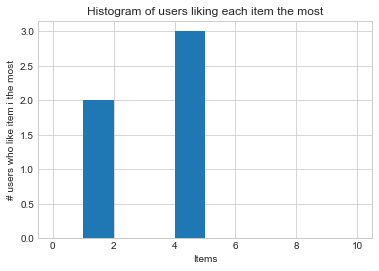

RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.73 0.61 0.42 0.11 0.75 0.11 0.11 0.16 0.11 0.16]
 [0.58 0.68 0.48 0.14 0.82 0.25 0.04 0.29 0.14 0.45]
 [0.67 0.67 0.31 0.02 0.83 0.20 0.06 0.21 0.02 0.36]
 [0.61 0.76 0.44 0.12 0.71 0.14 0.03 0.36 0.12 0.52]
 [0.51 0.76 0.47 0.03 0.66 0.18 0.05 0.38 0.03 0.45]]
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 10
RECOMMENDER - Attributes of each item (rows):
[[0.00 1.00 0.00 0.00 1.00 1.00 1.00 1.00 0.00 1.00]
 [0.00 0.00 1.00 1.00 1.00 0.00 1.00 1.00 0.00 1.00]
 [0.00 0.00 1.00 1.00 0.00 1.00 1.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]
 [1.00 0.00 1.00 0.00 1.00 1.00 1.00 1.00 0.00 1.00]
 [1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00]
 [1.00 1.00 0.00 1.0

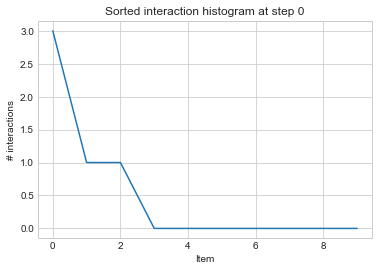

RECOMMENDER - System updates user profiles based on last interaction:
[[1 1 2 1 3 2 3 3 0 3]
 [0 1 1 1 1 2 3 1 0 1]
 [2 2 1 1 2 2 2 2 0 2]
 [1 1 2 3 1 1 2 1 0 1]
 [0 0 2 2 1 1 3 1 0 1]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.79 0.79 0.42 0.16 0.89 0.16 0.00 0.16 0.16 0.26]
 [0.82 0.73 0.64 0.27 0.82 0.09 0.00 0.18 0.27 0.18]
 [0.75 0.62 0.38 0.12 0.81 0.19 0.00 0.31 0.12 0.31]
 [0.54 0.77 0.62 0.15 0.69 0.23 0.00 0.38 0.15 0.38]
 [0.64 0.91 0.73 0.27 0.82 0.18 0.00 0.18 0.27 0.27]]
RECOMMENDER - Step 1
RECOMMENDER - Items ordered by preference for each user:
[[6 3 5 7 8 9 2]
 [6 5 7 9 8 1 4]
 [6 3 8 5 9 2 1]
 [6 3 8 5 9 0 4]
 [6 5 7 3 9 0 4]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2]
 [9]
 [5]
 [9]
 [4]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[8]
 [4]
 [1]
 [3]
 [5]]
USER_SCORES - User scores for given items are:
[[0.42 0.11]
 [0.45 0.82]
 [0.20 0.67]
 [0.52 

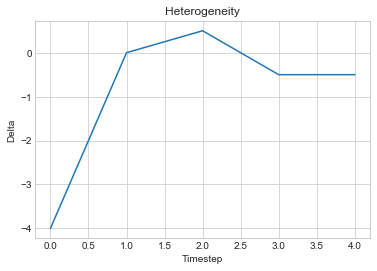

In [4]:
# Create recsys instance
rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, actual_user_scores=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)
 # lambda function
delta_t = rec.get_heterogeneity()

RECOMMENDER - Run -- interleave recommendations and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - Items ordered by preference for each user:
[[6 3 8 5 9]
 [5 7 8 9 1]
 [6 5 8 9 2]
 [6 3 8 5 0]
 [6 5 7 3 9]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[9 8]
 [1 5]
 [8 2]
 [5 5]
 [9 7]]
USER_SCORES - User scores for given items are:
[[0.16 0.11]
 [0.68 0.25]
 [0.02 0.31]
 [0.14 0.14]
 [0.45 0.38]]
RECOMMENDER - Users choose the following items respectively:
[9 1 2 5 9]


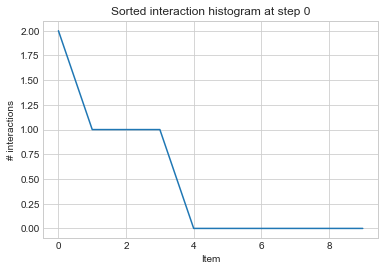

RECOMMENDER - System updates user profiles based on last interaction:
[[3 2 3 4 4 3 4 3 0 3]
 [1 1 3 2 3 3 5 3 1 3]
 [2 2 3 3 3 3 5 3 0 3]
 [4 1 4 4 3 2 3 2 0 2]
 [2 1 3 3 4 3 5 3 0 3]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.66 0.72 0.48 0.14 0.79 0.21 0.00 0.31 0.14 0.38]
 [0.72 0.76 0.52 0.20 0.84 0.16 0.04 0.16 0.20 0.24]
 [0.70 0.74 0.52 0.19 0.81 0.19 0.00 0.26 0.19 0.30]
 [0.52 0.72 0.52 0.12 0.80 0.32 0.00 0.36 0.12 0.44]
 [0.70 0.78 0.52 0.19 0.85 0.19 0.00 0.22 0.19 0.33]]
RECOMMENDER - Step 1
RECOMMENDER - Items ordered by preference for each user:
[[6 3 8 5]
 [5 7 8 9]
 [6 5 8 9]
 [6 3 8 0]
 [6 3 5 7]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[8 5]
 [7 5]
 [8 8]
 [3 6]
 [3 5]]
USER_SCORES - User scores for given items are:
[[0.11 0.11]
 [0.25 0.29]
 [0.02 0.02]
 [0.03 0.12]
 [0.18 0.03]]
RECOMMENDER - Users choose the following items respectively:
[5 7 8 3 5]
RECOMMENDER - System updates us

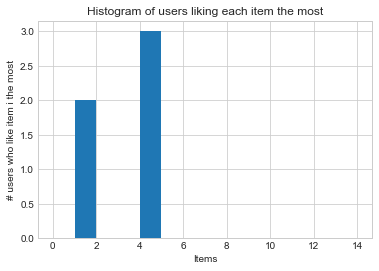

RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.64 0.73 0.52 0.18 0.82 0.24 0.00 0.30 0.18 0.36 0.21 0.42 0.48 0.21]
 [0.66 0.72 0.50 0.19 0.78 0.19 0.03 0.28 0.19 0.34 0.19 0.41 0.47 0.22]
 [0.64 0.73 0.52 0.18 0.82 0.24 0.00 0.30 0.18 0.36 0.21 0.42 0.48 0.21]
 [0.64 0.73 0.52 0.18 0.82 0.24 0.00 0.30 0.18 0.36 0.21 0.42 0.48 0.21]
 [0.61 0.70 0.48 0.15 0.79 0.24 0.03 0.30 0.15 0.36 0.21 0.39 0.45 0.24]]
RECOMMENDER - Items ordered by preference for each user:
[[ 6 10 13 11 12]
 [ 5 10 13 11 12]
 [ 6 10 13 11 12]
 [ 6 10 13 11 12]
 [ 3 10 13 11 12]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 6 13]
 [13 12]
 [13 10]
 [11 12]
 [13 13]]
USER_SCORES - User scores for given items are:
[[0.44 0.11]
 [0.05 0.33]
 [0.13 0.17]
 [0.11 0.25]
 [0.44 0.44]]
RECOMMENDER - Users choose the following items respectively:
[13 13 13 11 13]
RECOMMENDER - System updates user profiles based on last interaction:
[[5 2 4 4 4 3 6 3 

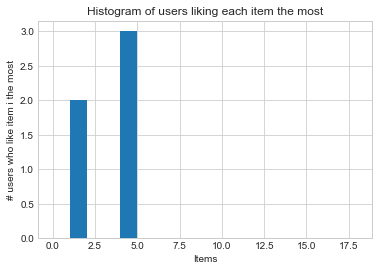

RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.59 0.67 0.52 0.17 0.80 0.26 0.04 0.28 0.17 0.33 0.24 0.41 0.50 0.26
  0.48 0.04 0.37 0.22]
 [0.59 0.67 0.52 0.17 0.80 0.26 0.04 0.28 0.17 0.33 0.24 0.41 0.50 0.26
  0.48 0.04 0.37 0.22]
 [0.59 0.67 0.52 0.17 0.80 0.26 0.04 0.28 0.17 0.33 0.24 0.41 0.50 0.26
  0.48 0.04 0.37 0.22]
 [0.59 0.67 0.52 0.17 0.80 0.26 0.04 0.28 0.17 0.33 0.24 0.41 0.50 0.26
  0.48 0.04 0.37 0.22]
 [0.59 0.67 0.52 0.17 0.80 0.26 0.04 0.28 0.17 0.33 0.24 0.41 0.50 0.26
  0.48 0.04 0.37 0.22]]
RECOMMENDER - Items ordered by preference for each user:
[[15 17 16 14]
 [15 17 16 14]
 [15 17 16 14]
 [15 17 16 14]
 [15 17 16 14]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[16 16]
 [16 15]
 [17 16]
 [14 14]
 [15 17]]
USER_SCORES - User scores for given items are:
[[0.41 0.41]
 [0.30 0.60]
 [0.43 0.41]
 [0.08 0.08]
 [0.24 0.15]]
RECOMMENDER - Users choose the following items respectively:
[16 16 16 

In [5]:
# Run for a single step
rec.run(timesteps=10, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)

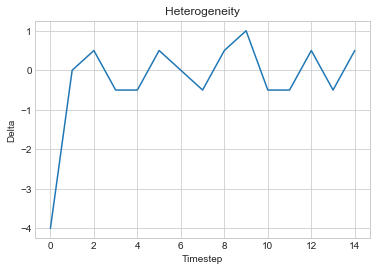

In [6]:
# Check heterogeneity again
delta_t = rec.get_heterogeneity()